### **Homework Assignment: Data Preprocessing for Machine Learning**

#### **Dataset**

Use the **California Housing Dataset** from Aurélien Géron's GitHub repo:

In [35]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    try:
        os.makedirs(housing_path, exist_ok=True)

        tgz_path = os.path.join(housing_path, "housing.tgz")
        print(f"Downloading {housing_url}...")
        urllib.request.urlretrieve(housing_url, tgz_path)

        print("Extracting archive...")
        with tarfile.open(tgz_path) as housing_tgz:
            housing_tgz.extractall(path=housing_path)
            print("Extraction completed.")

        return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

# Fetch and load data
if fetch_housing_data():
    csv_path = os.path.join(HOUSING_PATH, "housing", "housing.csv")  # ✅ Corrected path
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        print("Data loaded successfully!")
        print(df.head())
    else:
        print(f"Error: Could not find {csv_path} after extraction")
else:
    print("Failed to download the housing data")


Extracting archive...
Extraction completed.
Data loaded successfully!
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## **Part 1: Exploratory Data Analysis (EDA)**

1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

2. Identify:

   * Columns with missing values.
   * Numerical vs categorical features.
   * Columns with unusual distributions or outliers.

In [36]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [39]:
df.select_dtypes(include=["object", "category"]).apply(pd.Series.value_counts)

,ocean_proximity
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [40]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

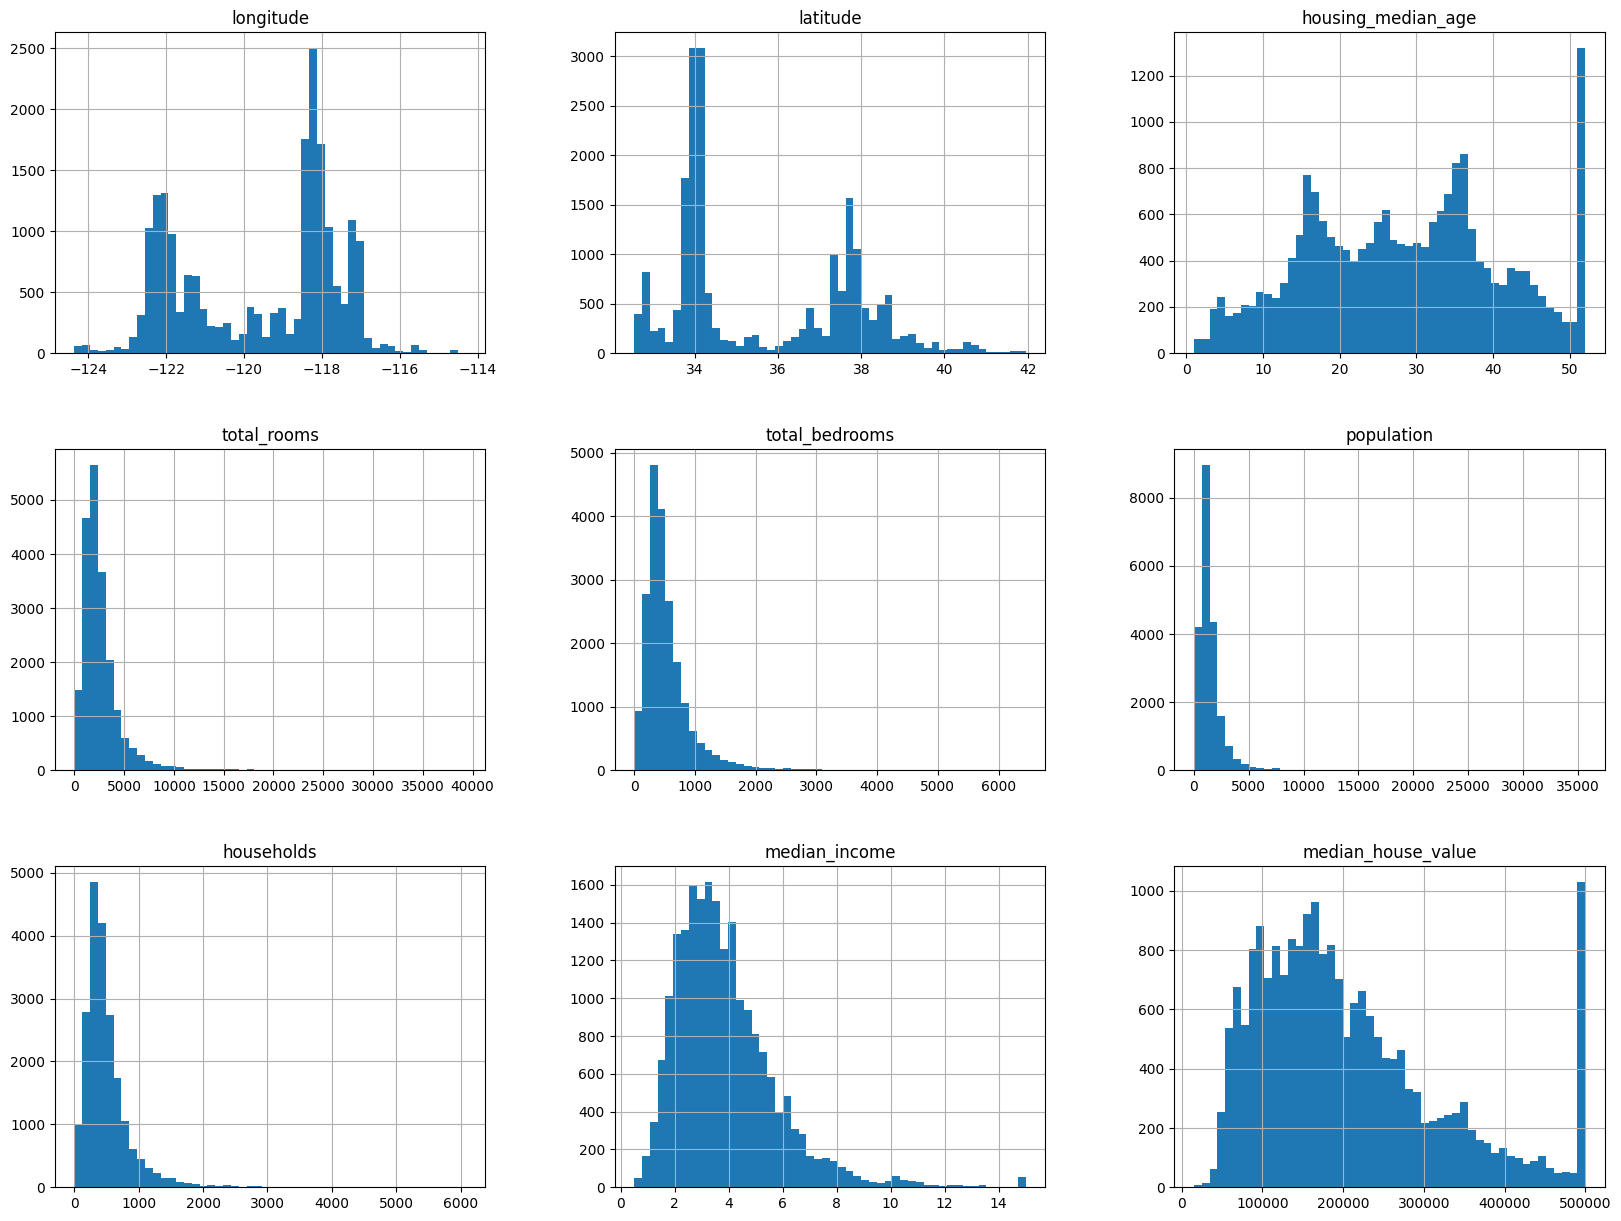

In [25]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [42]:
# old datadrame
old_df = df.copy()

## **Part 2: Handling Missing Values**

3. For missing data:

   * Drop any row or column if missing values are insignificant.
   * Use **median** imputation for `total_bedrooms`.

4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

In [43]:
# median imputation
median = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)

In [ ]:
# missing value report func
def missing_value_report(df):
    total = df.isnull().sum()
    percent = 100 * df.isnull().sum() / len(df)
    
    return pd.DataFrame({'total': total, 'percent': percent}).sort_values('percent', ascending=False)

# missing value report
missing_value_report(old_df)
    

,total,percent
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


## **Part 3: Encoding Categorical Variables**

5. Encode the `ocean_proximity` column:

   * Use **One-Hot Encoding** via `pd.get_dummies()` or `OneHotEncoder`.

In [47]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


## **Part 4: Feature Scaling**

6. For numerical features:

   * Apply both **StandardScaler** and **MinMaxScaler** to features like:

     * `median_income`, `housing_median_age`, `population`, `median_house_value`
   * Plot feature histograms before and after scaling.

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['median_income', 'housing_median_age', 'population', 'median_house_value']
# create object
scaler_df = StandardScaler()
scaler_minmax = MinMaxScaler()

# copy for old/new plots
df_std = df.copy()
df_minmax = df.copy()

# fit_transform
df_std[features] = scaler_df.fit_transform(df[features])
df_minmax[features] = scaler_minmax.fit_transform(df[features])

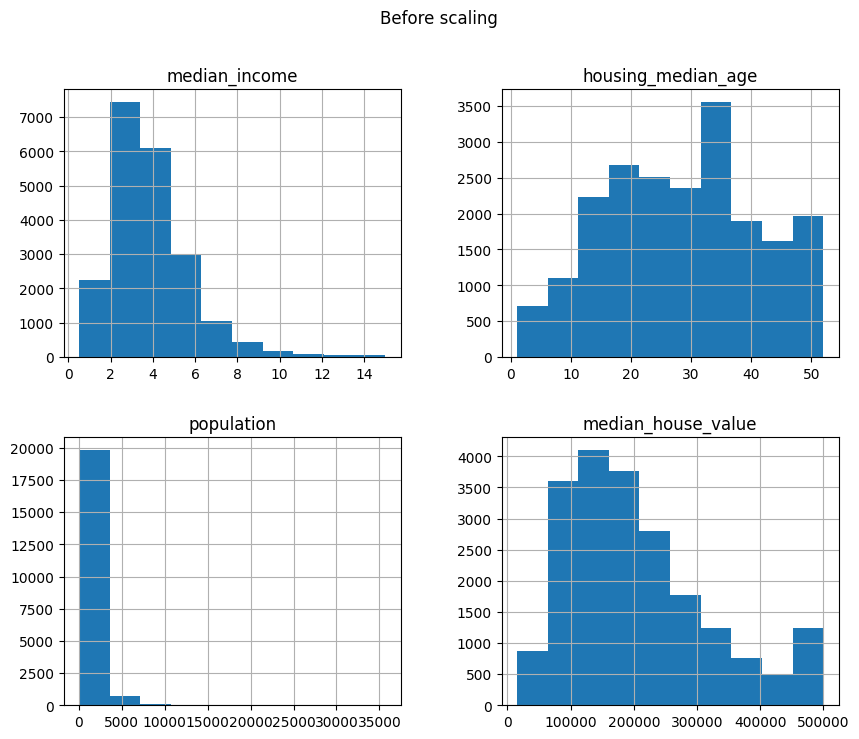

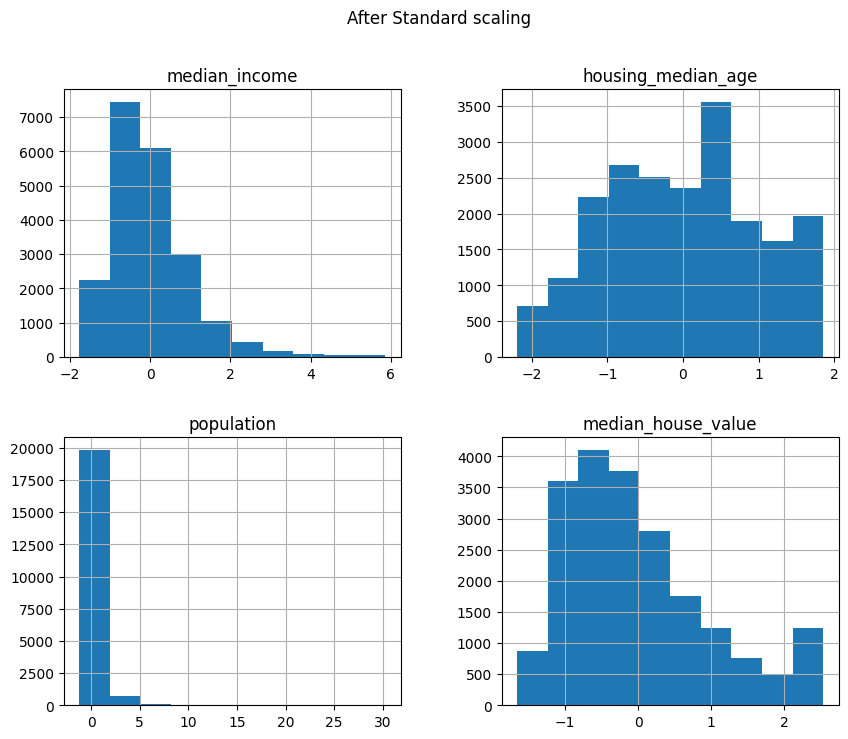

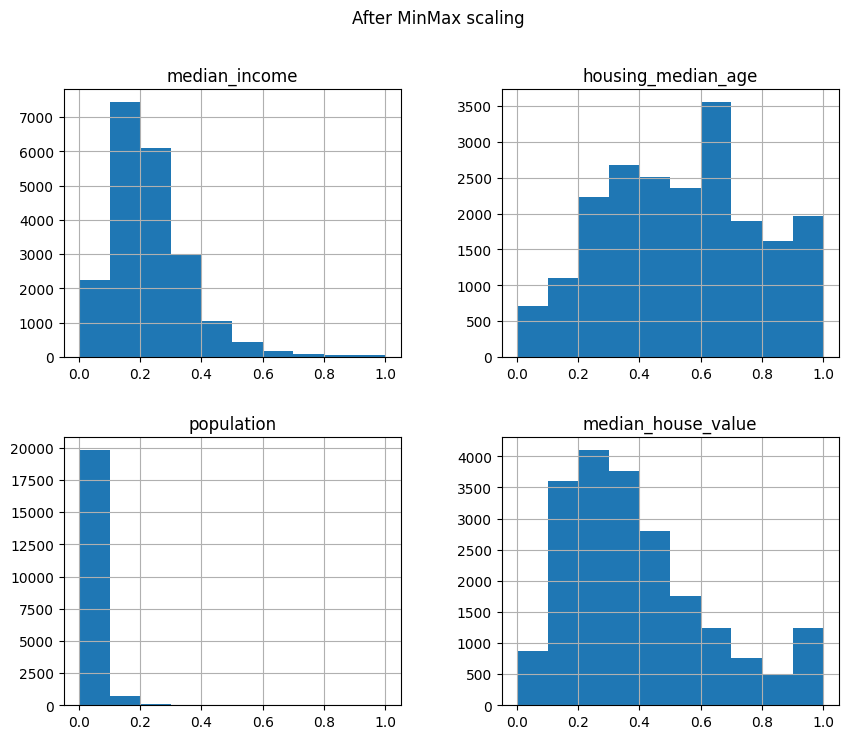

In [51]:
df[features].hist(figsize=(10,8))
plt.suptitle('Before scaling')   
plt.show()

df_std[features].hist(figsize=(10,8)) 
plt.suptitle('After Standard scaling')   
plt.show()

df_minmax[features].hist(figsize=(10,8)) 
plt.suptitle('After MinMax scaling')   
plt.show()




---

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:

   * `rooms_per_household = total_rooms / households`
   * `bedrooms_per_room = total_bedrooms / total_rooms`
   * `population_per_household = population / households`